## Aufgabe 1 Aufgabenteil 2
### 2.1

As we are using only the training data split the numbers may vary if the split is regenerated. This happens because the rows are split randomly into test, training and validation.

In [5]:
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

imdb_score_mean = data['imdb_score'].mean()
imdb_score_std = data['imdb_score'].std()
imdb_votes_mean = data['imdb_votes'].mean()
imdb_votes_std = data['imdb_votes'].std()

print(f'imdb score:\n  mean: {round(imdb_score_mean, 2)}\n  standard deviation: {round(imdb_score_std, 2)}')
print(f'imdb votes:\n  mean: {round(imdb_votes_mean, 2)}\n  standard deviation: {round(imdb_votes_std, 2)}')

imdb score:
  mean: 6.55
  standard deviation: 1.18
imdb votes:
  mean: 21739.06
  standard deviation: 81203.5


### 2.2

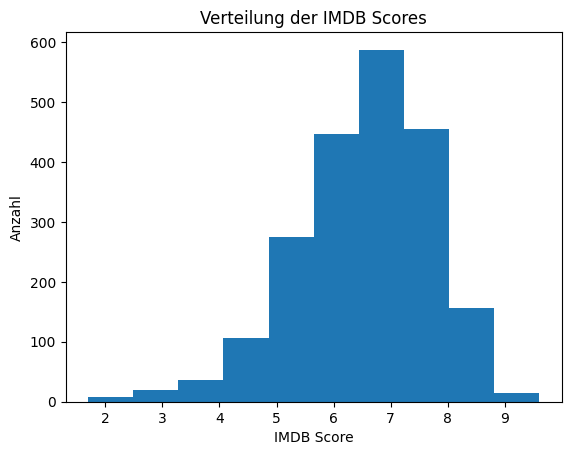

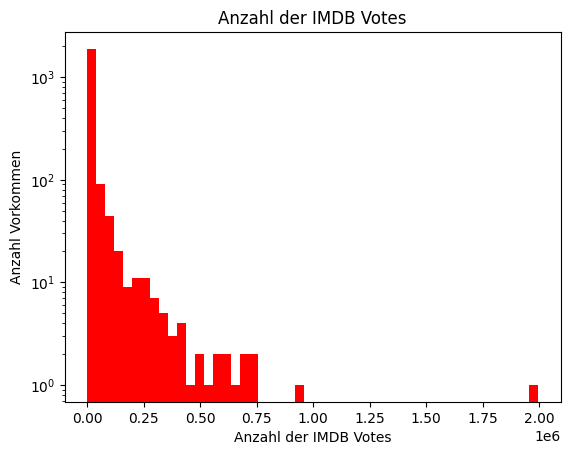

In [6]:
import pandas as pd
import matplotlib.pyplot as plot

data = pd.read_pickle('./files/train.pickle')

#imdb score histogram
plot.hist(data['imdb_score'], bins=10)
plot.title('Verteilung der IMDB Scores')
plot.xlabel('IMDB Score')
plot.ylabel('Anzahl')
plot.show()

#imdb votes histogram
plot.hist(data['imdb_votes'], bins=50,histtype='stepfilled', color='red')

#set y-axis to logarithmic scale (makes it easier to see the distribution)
plot.yscale('log')

plot.title('Anzahl der IMDB Votes')
plot.xlabel('Anzahl der IMDB Votes')
plot.ylabel('Anzahl Vorkommen')
plot.show()

### 2.3

### 2.4

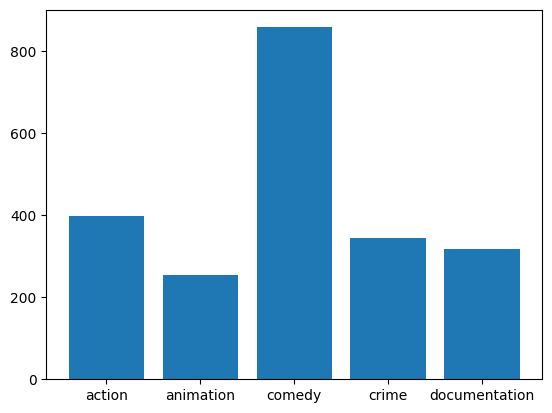

In [7]:
import matplotlib.pyplot as plot
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

names = ['action', 'animation', 'comedy', 'crime', 'documentation']
values = []
for c in names:
    values.append(data[c].sum())

fix, ax = plot.subplots()

ax.bar(names, values)

plot.show()

### 2.5

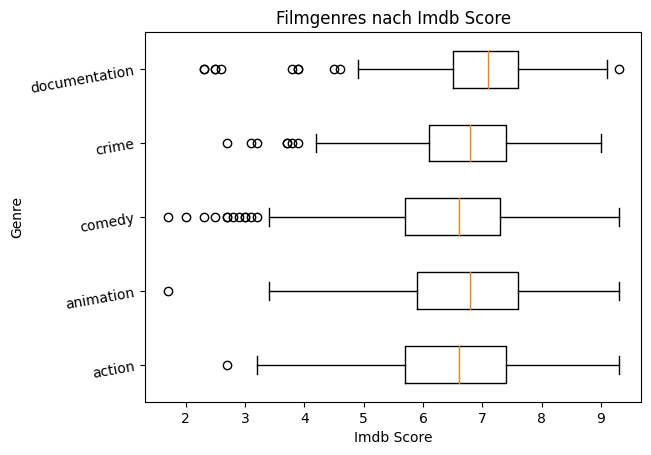

In [8]:
import matplotlib.pyplot as plot
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

action = data.loc[data['action'] == 1]
imdb_score_action = action['imdb_score']

animation = data.loc[data['animation'] == 1]
imdb_score_animation = animation['imdb_score']

comedy = data.loc[data['comedy'] == 1]
imdb_score_comedy = comedy['imdb_score']

crime = data.loc[data['crime'] == 1]
imdb_score_crime = crime['imdb_score']

documentation = data.loc[data['documentation'] == 1]
imdb_score_documentation = documentation['imdb_score']

columns = [imdb_score_action, imdb_score_animation, imdb_score_comedy, imdb_score_crime, imdb_score_documentation]

# print(imdb_score_action)

fig, ax = plot.subplots()

ax.boxplot(columns, vert = 0)
ax.set_title('Filmgenres nach Imdb Score')
ax.set_xlabel('Imdb Score')
ax.set_ylabel('Genre')
plot.yticks([1, 2, 3, 4, 5], ["action", "animation", "comedy", "crime", "documentation"], rotation=10)
plot.show()

